In [14]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.models import Model
import pandas as pd


# First Thermal model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/thermal sampling/thermal training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/thermal sampling/thermal testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 4
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

#Secound Camera model

image_list = []

def my_load_Train_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/train/training/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_2() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/test/testing/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X2_train = my_load_Train_data_2()
X2_test = my_load_Test_data_2()
print(len(X2_test))
y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_labels.csv')
y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_test_labels.csv')
y2_test.values.reshape(-1,1)

n_classes = 4
X2_train = np.array(X2_train)
Y2_train = np.array(y2_train)
X2_test = np.array(X2_test)
Y2_test = np.array(y2_test)

Y2_train = np_utils.to_categorical(Y2_train, n_classes)
Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(Thermal)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# Model 2

# convolutional layer
inp2 = Input(shape=(32, 32, 3))

# convolutional layer
conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=Dense(25, activation='relu')(flat1)
dense2=Dense(10, activation='relu')(hidd1)
output2=Flatten()(dense2)
# concatinate two models 


concat1 = concatenate([output1, output2])
Out  = Dense(4, activation='softmax')(concat1)

model = Model(inputs=[inp1, inp2], outputs = Out)

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 


## output layer
#model_1.add(Dense(2, activation='softmax'))

## compiling the sequential model
#model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model for 10 epochs
history= model.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))




40
Epoch 1/15
1/1 [==============================] - 0s 400ms/step - loss: 1.3865 - accuracy: 0.2500 - val_loss: 1.3602 - val_accuracy: 0.2500
Epoch 2/15
1/1 [==============================] - 0s 217ms/step - loss: 1.3639 - accuracy: 0.2500 - val_loss: 1.3161 - val_accuracy: 0.4250
Epoch 3/15
1/1 [==============================] - 0s 215ms/step - loss: 1.3168 - accuracy: 0.4667 - val_loss: 1.2706 - val_accuracy: 0.3500
Epoch 4/15
1/1 [==============================] - 0s 256ms/step - loss: 1.2681 - accuracy: 0.3667 - val_loss: 1.1733 - val_accuracy: 0.7000
Epoch 5/15
1/1 [==============================] - 0s 184ms/step - loss: 1.1650 - accuracy: 0.6833 - val_loss: 1.0780 - val_accuracy: 0.7500
Epoch 6/15
1/1 [==============================] - 0s 181ms/step - loss: 1.0696 - accuracy: 0.7000 - val_loss: 0.9601 - val_accuracy: 0.8500
Epoch 7/15
1/1 [==============================] - 0s 185ms/step - loss: 0.9537 - accuracy: 0.8000 - val_loss: 0.8872 - val_accuracy: 0.8750
Epoch 8/15
1/1 [=

In [7]:
import pandas as pd
import numpy as np 
import itertools
import keras
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.models import Sequential 
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dropout, Flatten, Dense 
from keras import applications 
from keras.utils.np_utils import to_categorical 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time


#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model.evaluate([X1_test,X2_test],Y2_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

1/1 [==============================] - 0s 3ms/step - loss: 0.1432 - accuracy: 0.9500
[INFO] Accuracy: 95.00%
[INFO] Loss: 0.143209770321846
Time:  0:00:00.210674


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


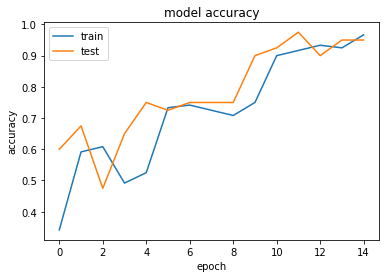

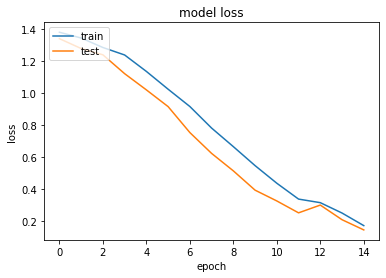

In [8]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()





In [9]:
#model.save("concatModel")
# make a prediction for a new image.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
# load the image thermal
img1 = load_img('pt10.jpg', target_size=(32, 32))
# convert to array
img1 = img_to_array(img1)
# reshape into a single sample with 3 channels
img1 = img1.reshape(1,32, 32, 3)
# prepare pixel data
img1 = img1.astype('float32')
img1 = img1 / 255.0

# for second Model
img2 = load_img('p10.jpg', target_size=(32, 32))
# convert to array
img2 = img_to_array(img2)
# reshape into a single sample with 3 channels
img2 = img2.reshape(1,32, 32, 3)
# prepare pixel data
img2 = img2.astype('float32')
img2 = img2 / 255.0
result = model.predict([img1,img2])
print(result)

[[1.4645750e-04 2.3118202e-03 7.5969961e-04 9.9678195e-01]]


In [10]:
import numpy as np
from sklearn.metrics import confusion_matrix

preds = np.round(model.predict([X1_test,X2_test]),0)
#print('rounded test_labels', preds)


print('Classification Matrix')

fusion = ['apple','banana','laptop','aeroplane']
classification_metrics = metrics.classification_report(Y2_test, preds,target_names = fusion)
print(classification_metrics)

print('Confusion Matrix')

sign=[0,1,2,3]
cf_matrix = confusion_matrix(Y2_test.argmax(axis=1), preds.argmax(axis=1),sign)
print(cf_matrix)

Classification Matrix
              precision    recall  f1-score   support

       apple       0.90      0.90      0.90        10
      banana       1.00      0.90      0.95        10
      laptop       1.00      1.00      1.00        10
   aeroplane       1.00      1.00      1.00        10

   micro avg       0.97      0.95      0.96        40
   macro avg       0.97      0.95      0.96        40
weighted avg       0.97      0.95      0.96        40
 samples avg       0.95      0.95      0.95        40

Confusion Matrix
[[10  0  0  0]
 [ 1  9  0  0]
 [ 0  0 10  0]
 [ 0  0  0 10]]


C:\Users\MANDEEP SINGH SHERRY\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MANDEEP SINGH SHERRY\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[0, 1, 2, 3] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Normalized confusion matrix


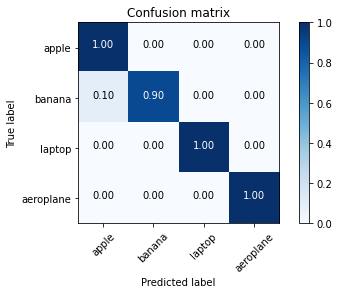

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix

categorical_test_labels = pd.DataFrame(Y2_test).idxmax(axis=1)
categorical_preds = pd.DataFrame(preds).idxmax(axis=1)
confusion_matrix= confusion_matrix(categorical_test_labels, categorical_preds)

#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
   normalize=False,
   title='Confusion matrix',
   cmap=plt.cm.Blues):
 
#Add Normalization Option
 #‘’’prints pretty confusion metric with normalization option ‘’’
   if normalize:
     cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
     print('Normalized confusion matrix')
   else:
     print('Confusion matrix, without normalization')
 
# print(cm)
 
   plt.imshow(cm, interpolation='nearest', cmap=cmap)
   plt.title(title)
   plt.colorbar()
   tick_marks = np.arange(len(classes))
   plt.xticks(tick_marks, classes, rotation=45)
   plt.yticks(tick_marks, classes)
 
   fmt = '.2f' if normalize else 'd'
   thresh = cm.max() / 2.
   for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')
 
   plt.tight_layout()
   plt.ylabel('True label')
   plt.xlabel('Predicted label')
    
    
    
plot_confusion_matrix(confusion_matrix, ['apple','banana','laptop','aeroplane'] , normalize= True)   

In [12]:
print("probality of Apple")
print(result[0][0]*100)
print("probality of Banana")
print(result[0][1]*100)
print("probality of Laptop")
print(result[0][2]*100)
print("probality of aeroplane")
print(result[0][3]*100)

probality of Apple
0.01464575034333393
probality of Banana
0.2311820164322853
probality of Laptop
0.07596996147185564
probality of aeroplane
99.67819452285767


In [13]:
# loaded_model = keras.models.load_model("concatModel")
# result = loaded_model.predict([img1,img2])
# print(result)

# print("probality of Apple")
# print(result[0][0]*100)
# print("probality of Banana")
# print(result[0][1]*100)
# print("probality of Laptop")
# print(result[0][2]*100)
# print("probality of aeroplane")
# print(result[0][3]*100)


[[1.7508146e-06 3.6979113e-02 6.5375734e-03 9.5648152e-01]]
probality of Apple
0.00017508145901956595
probality of Banana
3.6979112774133682
probality of Laptop
0.6537573412060738
probality of aeroplane
95.64815163612366
